<a href="https://colab.research.google.com/github/aalr007/VisionComputacional/blob/main/4_convolutionALR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Image Convolution

## Table of Contents
1. [Libraries](#libraries)
2. [Simple Example](#simple)
3. [PyTorch Convolution](#pytorch)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [327]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Simple Convolution <a class="anchor" id="simple" ></a>

### Definition

- __I__: Image to convolve.
- __H__: filter matrix to convolve the image with.
- __J__: Result of the convolution.

The following graphics shows exemplary the mathematical operations of the convolution. The filter matrix __H__ is shifted over the input image __I__. The values 'under' the filter matrix are multiplicated with the corresponding values in __H__, summed up and writen to the result __J__. The target position is usually the position under the center of __H__.

<img src="data/convolution.png" width="70%">

In order to implement the convolution with a block filter, we need two methods. The first one will create the block filter matrix __H__ depending on the filter width/height __n__. 

A block filter holds the value $\dfrac{1}{n\cdot n}$ at each position:

In [328]:
def block_filter(n):
    H = np.ones((n, n)) / (n * n) # each element in H has the value 1/(n*n) matriz de 5x5 de puros 1 dividida entre la multiplicacion del tamaño de renglon o columna (n)
    return H

We will test the method by creating a filter with ``n = 5``:

In [329]:
H = block_filter(5)
print(H)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Next, we define the actual convolution operation. To prevent invalid indices at the border of the image, we introduce the padding __p__.

In [330]:
def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros

    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
            
    return J

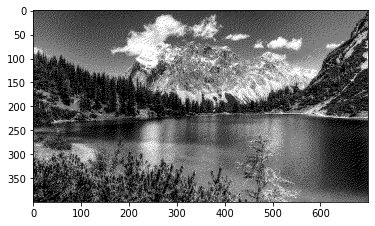

In [344]:
image = Image.open('sample_data/image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)

# image = np.zeros((200, 200), dtype=np.float)
# for x in range(200):
#     for y in range(200):
#         d = ((x-100)**2+(y-100)**2)**0.5
#         image[x, y] = d % 8 < 4

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [345]:
image = image.astype(float)

Next we test our implementation and apply a block filter with size 7

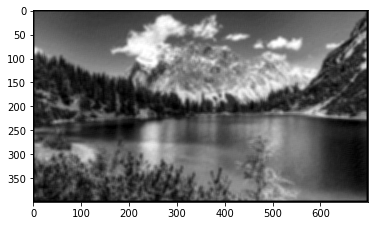

In [346]:
n = 7
H = block_filter(n)
J = apply_filter(image, H)

plt.imshow(J, cmap='gray')
plt.show()

In [347]:
print(H)

[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


## PyTorch Convolution <a class="anchor" id="pytorch" ></a>

In [348]:
from PIL import Image

img = Image.open('sample_data/image.jpg')
img.thumbnail((256,256), Image.ANTIALIAS) # Resize to half to reduce the size of this notebook.

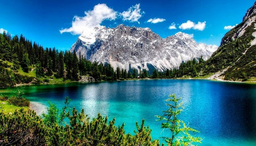

In [349]:
img

In [350]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [351]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

In [352]:
input = to_tensor(img)
input.shape


torch.Size([1, 146, 256])

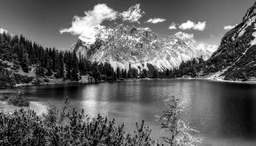

In [353]:
to_pil(input)

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3
+ `stride = 1`: the stride for the cross-correlation is 1
+ `padding = 1`: zero-paddings on both sides for 1 point for each dimension
+ `bias = False`: no bias parameter (for simplicity)

In [354]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

In [355]:
# The code below does not work because the convolution layer requires the dimension for batch.
conv(input)

tensor([[[0.1765, 0.1627, 0.1603,  ..., 0.2224, 0.2543, 0.1641],
         [0.2905, 0.3797, 0.3791,  ..., 0.5382, 0.5341, 0.3002],
         [0.2960, 0.3883, 0.3837,  ..., 0.5504, 0.3951, 0.2305],
         ...,
         [0.1178, 0.1108, 0.2113,  ..., 0.3946, 0.3792, 0.2865],
         [0.0313, 0.1766, 0.1665,  ..., 0.4206, 0.4118, 0.3198],
         [0.1114, 0.1609, 0.0839,  ..., 0.4072, 0.3993, 0.2164]]],
       grad_fn=<SqueezeBackward1>)

We need to insert a dimension for a batch at dim=0.

In [356]:
input = input.unsqueeze(0)
input.shape

torch.Size([1, 1, 146, 256])

In [357]:
output = conv(input)
output.shape

torch.Size([1, 1, 146, 256])

Setting `padding=1` in the convolution layer, we obtain an image of the same size.

In [358]:
output.shape

torch.Size([1, 1, 146, 256])

We need to remove the first dimension before converting to a PIL object.

In [359]:
output.data.squeeze(dim=0).shape

torch.Size([1, 146, 256])

Display the output from the convolution layer by converting `output` to a PIL object.

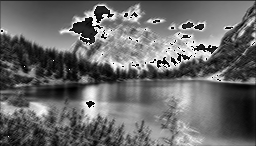

In [360]:
to_pil(output.data.squeeze(dim=0))

Clip every value in the output tensor within the range of [0, 1].

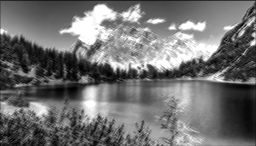

In [361]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

In [362]:
def display(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

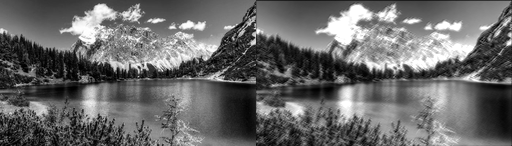

In [363]:
display(input, output)

### Identity

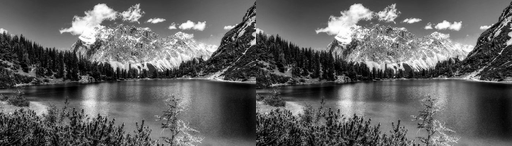

In [364]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

output = conv(input)
display(input, output)

### Brighten

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


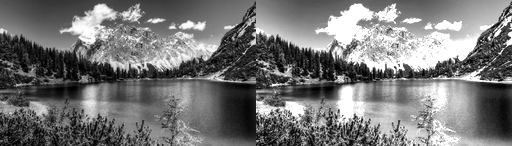

In [365]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Darken

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


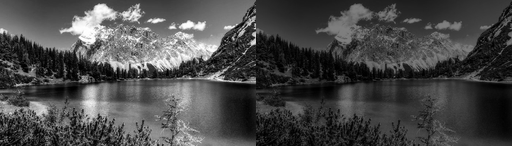

In [366]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Box blur

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


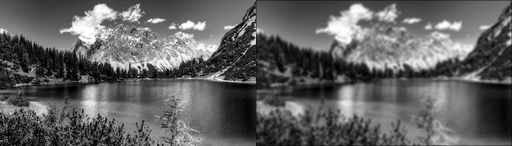

In [367]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Gaussian blur

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])


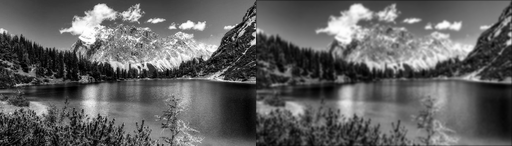

In [368]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Sharpen

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


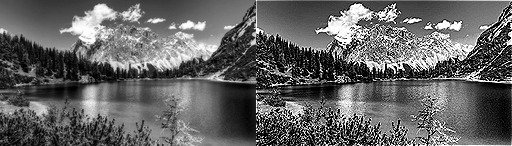

In [369]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[ 0., -2.,  0.],
          [-2., 10., -2.],
          [ 0., -2.,  0.]]]])


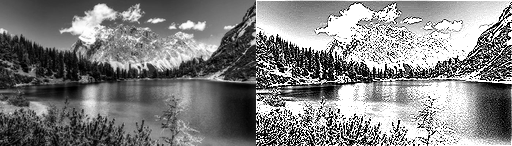

In [370]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Edge detection

tensor([[[[ 0.,  1.,  0.],
          [ 1., -4.,  1.],
          [ 0.,  1.,  0.]]]])


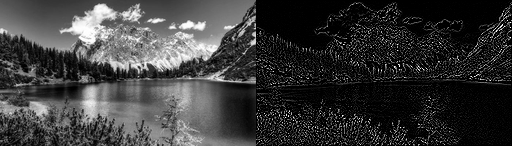

In [371]:
conv.weight.data = torch.tensor([[[
    [0., 1., 0.],
    [1., -4., 1.],
    [0., 1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

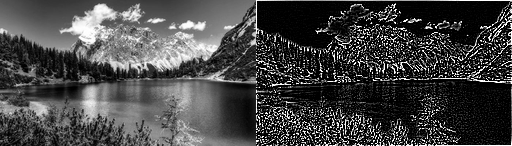

In [372]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
output = conv(input)
display(input, output)

In [373]:
# TODO: Challenge, hard image with hard transformations

#1
Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

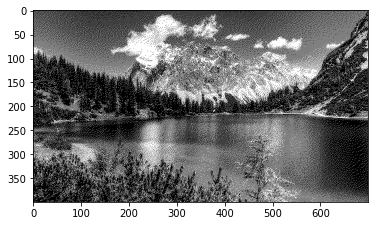

In [374]:
image = Image.open('sample_data/image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)
image = image.astype(float)
plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

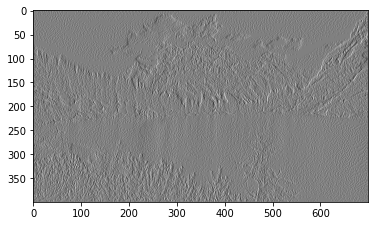

In [381]:
#Prewitt
#vertical
H =  np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]) 
J = apply_filter(image, H)
plt.imshow(J, cmap='gist_gray')
plt.show()

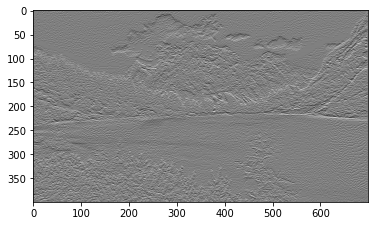

In [382]:
#Prewitt
#horizontal
H =  np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  
J = apply_filter(image, H)
plt.imshow(J, cmap='gist_gray')
plt.show()

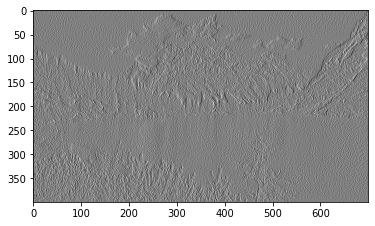

In [377]:
#Sobel
#vertical
H =  np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
J = apply_filter(image, H)
plt.imshow(J, cmap='gist_gray')
plt.show()

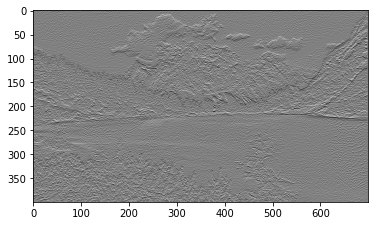

In [378]:
#Sobel
#horizontal
H =   np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
J = apply_filter(image, H)
plt.imshow(J, cmap='gist_gray')
plt.show()

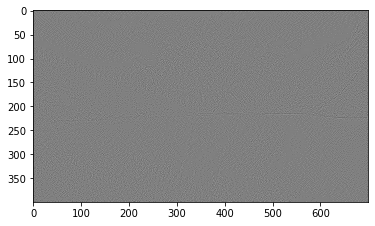

In [383]:
#laplaciano
#horizontal
H = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
J = apply_filter(image, H)
plt.imshow(J, cmap='gist_gray')
plt.show()

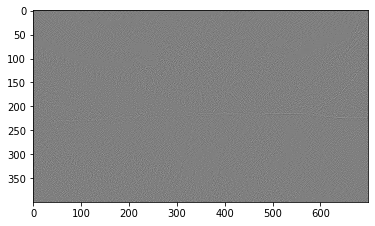

In [384]:
#laplaciano
#vertical
H = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
J = apply_filter(image, H)
plt.imshow(J, cmap='gist_gray')
plt.show()

#2
Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

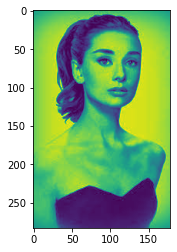

In [421]:
image2 = Image.open('sample_data/AH.jpeg').convert("L")
plt.imshow(image2)

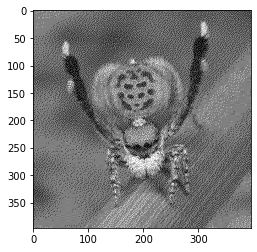

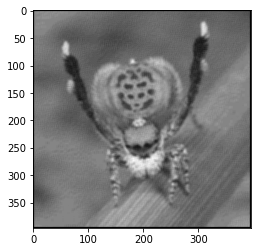

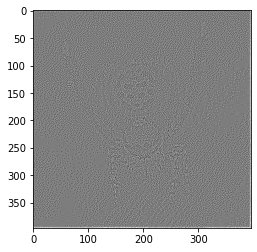

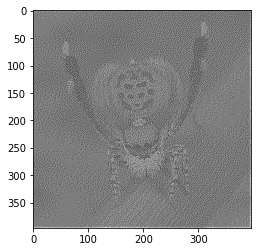

In [418]:
#image2 = Image.open('sample_data/dancing-spider.jpg')
image2 = Image.open('sample_data/AH.jpeg')
image2 = image2.convert('1') # convert image to black and white

image2 = np.array(image)
image2 = image.astype(float)

n = 5
H = block_filter(n)
Suavizada = apply_filter(image, H)

detalle=image2-Suavizada

sharpened=image2+(detalle*2)

plt.imshow(image2, cmap='gray')
plt.show()
plt.imshow(Suavizada, cmap='gray')
plt.show()
plt.imshow(detalle, cmap='gray')
plt.show()
plt.imshow(sharpened, cmap='gray')
plt.show()

#3
Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

* https://nikatsanka.github.io/comparing-edge-detection-methods.html
* https://www.geeksforgeeks.org/edge-detection-using-prewitt-scharr-and-sobel-operator/
* https://gist.github.com/rahit/c078cabc0a48f2570028bff397a9e154